<H1>module import

In [1]:
import pandas as pd
%load_ext tensorboard

In [2]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

데이터 로드 및 전처리

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

# 축 추가
#x_train = x_train[..., np.newaxis]
#x_test = x_test[..., np.newaxis]

# image resize (0~1사이의 값으로)
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 각 데이터 변수 선언

In [4]:
train_data = x_train
#np.save('test.npz', train_data)

In [5]:
train_label = y_train

In [18]:
# img로 저장
i = 0
a = 0
for i in range(3):
    # plt.imsave(f'{train_label[i]}_{a}.jpg', train_data[i])
    plt.imsave(f'{train_label[i]}_{a}.jpg', train_data[i])
    a += 1

In [9]:
# csv 파일로 저장
import pandas as pd
x_train = x_train.reshape((60000, -1))
arr = x_train
df = pd.DataFrame(arr)
df.to_csv('sample1.csv', index=False)

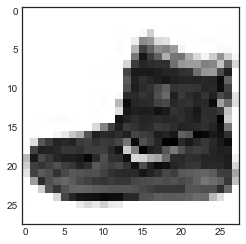

In [36]:
plt.imshow(x_train[0])

In [7]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<H2>모델 구성 및 컴파일

In [14]:
def build_model():
    model = Sequential()

    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=(3, 3))(input)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = Flatten()(output)
    output = Dense(units=128, activation='relu')(output)
    output = Dense(units=64, activation='relu')(output)
    output = Dense(units=10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model

model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

<H2>모델 학습

In [15]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25


2022-08-16 00:50:11.386866: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-16 00:50:11.652234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.5196 - acc: 0.8148

2022-08-16 00:50:22.830761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 13s 32ms/step - loss: 0.5196 - acc: 0.8148 - val_loss: 0.4031 - val_acc: 0.8552
Epoch 2/25
329/329 [==============================] - 10s 32ms/step - loss: 0.3460 - acc: 0.8738 - val_loss: 0.3552 - val_acc: 0.8740
Epoch 3/25
329/329 [==============================] - 9s 29ms/step - loss: 0.2918 - acc: 0.8922 - val_loss: 0.3548 - val_acc: 0.8762
Epoch 4/25
329/329 [==============================] - 10s 30ms/step - loss: 0.2451 - acc: 0.9087 - val_loss: 0.3591 - val_acc: 0.8745
Epoch 5/25
329/329 [==============================] - 10s 29ms/step - loss: 0.2150 - acc: 0.9206 - val_loss: 0.3921 - val_acc: 0.8677
Epoch 6/25
329/329 [==============================] - 10s 30ms/step - loss: 0.1819 - acc: 0.9331 - val_loss: 0.4307 - val_acc: 0.8725
Epoch 7/25
329/329 [==============================] - 13s 38ms/step - loss: 0.1660 - acc: 0.9394 - val_loss: 0.4588 - val_acc: 0.8679
Epoch 8/25
329/329 [==============================] - 12s 36ms/step - loss

In [16]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

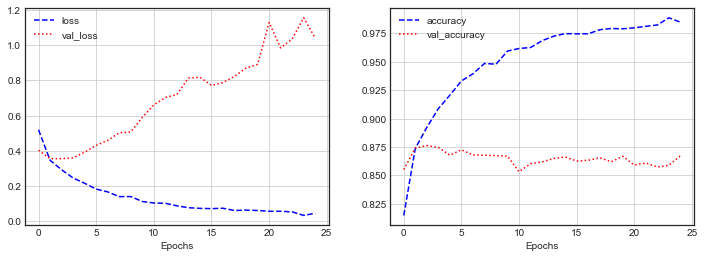

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [19]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0653 - acc: 0.8589


[1.0652672052383423, 0.8589000701904297]

In [58]:
preditions = model_1.predict(x_test)
print(preditions[0])
print(np.argmax(preditions[0]))

2022-08-16 09:35:19.724921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[2.52070701e-35 3.88128123e-22 2.04764871e-32 1.56682553e-32
 3.02397242e-28 1.63285219e-10 1.10551335e-32 1.73567702e-10
 2.40869700e-23 1.00000000e+00]
9


In [20]:
def build_model2():
    model = Sequential()

    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=(3, 3))(input)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = MaxPool2D(strides=(2, 2))(output)

    output = Flatten()(output)
    output = Dense(units=128, activation='relu')(output)
    output = Dropout(0.3)(output)
    output = Dense(units=64, activation='relu')(output)
    output = Dropout(0.3)(output)
    output = Dense(units=10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model

model_2 = build_model2()
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          3692

In [21]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25


2022-08-16 00:59:39.027282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.8731 - acc: 0.6861

2022-08-16 00:59:45.155115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 7s 20ms/step - loss: 0.8731 - acc: 0.6861 - val_loss: 0.5471 - val_acc: 0.8006
Epoch 2/25
329/329 [==============================] - 6s 19ms/step - loss: 0.5590 - acc: 0.7995 - val_loss: 0.4688 - val_acc: 0.8272
Epoch 3/25
329/329 [==============================] - 6s 18ms/step - loss: 0.4877 - acc: 0.8261 - val_loss: 0.4314 - val_acc: 0.8423
Epoch 4/25
329/329 [==============================] - 6s 17ms/step - loss: 0.4401 - acc: 0.8432 - val_loss: 0.3990 - val_acc: 0.8538
Epoch 5/25
329/329 [==============================] - 6s 17ms/step - loss: 0.4059 - acc: 0.8544 - val_loss: 0.3976 - val_acc: 0.8563
Epoch 6/25
329/329 [==============================] - 6s 17ms/step - loss: 0.3764 - acc: 0.8649 - val_loss: 0.3757 - val_acc: 0.8633
Epoch 7/25
329/329 [==============================] - 6s 17ms/step - loss: 0.3551 - acc: 0.8721 - val_loss: 0.4112 - val_acc: 0.8450
Epoch 8/25
329/329 [==============================] - 6s 17ms/step - loss: 0.336

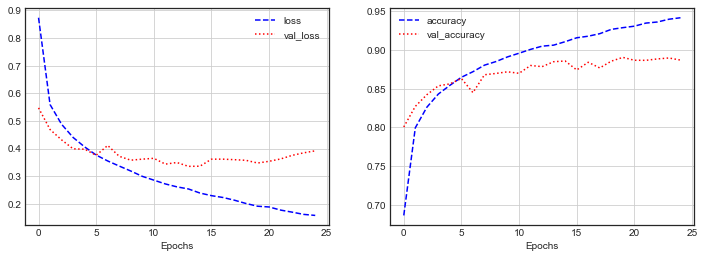

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [23]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4230 - acc: 0.8783


[0.4230375289916992, 0.8783000707626343]

In [24]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [10]:
def build_model3():
    model = Sequential()

    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Dropout(0.5)(output)

    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Dropout(0.5)(output)

    output = Flatten()(output)
    output = Dense(units=256, activation='relu')(output)
    output = Dropout(0.5)(output)

    output = Dense(units=100, activation='relu')(output)
    output = Dropout(0.5)(output)

    output = Dense(units=10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model

model_3 = build_model3()
model_3.summary()

Metal device set to: Apple M1


2022-08-18 14:40:59.275054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 14:40:59.275964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                             

In [31]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25


2022-08-16 01:13:06.235322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.7939 - acc: 0.7110

2022-08-16 01:13:31.353154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 28s 81ms/step - loss: 0.7939 - acc: 0.7110 - val_loss: 0.4143 - val_acc: 0.8489
Epoch 2/25
329/329 [==============================] - 24s 74ms/step - loss: 0.4237 - acc: 0.8459 - val_loss: 0.3327 - val_acc: 0.8761
Epoch 3/25
329/329 [==============================] - 24s 74ms/step - loss: 0.3500 - acc: 0.8724 - val_loss: 0.2856 - val_acc: 0.8966
Epoch 4/25
329/329 [==============================] - 25s 76ms/step - loss: 0.3162 - acc: 0.8862 - val_loss: 0.2769 - val_acc: 0.8989
Epoch 5/25
329/329 [==============================] - 25s 74ms/step - loss: 0.2896 - acc: 0.8960 - val_loss: 0.2517 - val_acc: 0.9065
Epoch 6/25
329/329 [==============================] - 25s 75ms/step - loss: 0.2712 - acc: 0.9019 - val_loss: 0.2356 - val_acc: 0.9133
Epoch 7/25
329/329 [==============================] - 25s 77ms/step - loss: 0.2588 - acc: 0.9064 - val_loss: 0.2227 - val_acc: 0.9183
Epoch 8/25
329/329 [==============================] - 21s 64ms/step - los

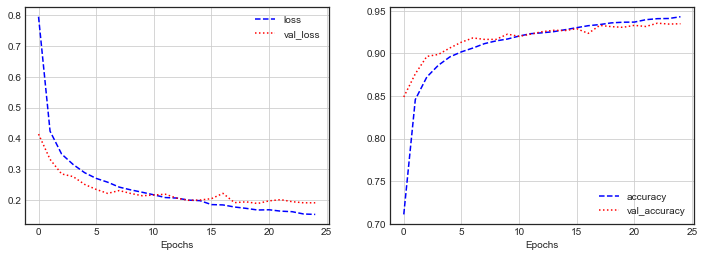

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [33]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2123 - acc: 0.9289


[0.21231287717819214, 0.9289000630378723]

In [37]:
# vgg16
from tensorflow.keras import layers

def VGG16_model():
    model = Sequential([
        # Conv 1
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu',
                     input_shape=(28,28,1), name='conv1_1'),
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', name='conv1_2'),
        layers.MaxPool2D((2,2), padding='same', name='conv1_MaxPool'),
        # Conv 2
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_1'),
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_2'),
        layers.MaxPool2D((2,2), padding='same', name='conv2_MaxPool'),
        # Conv3
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_1'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_2'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv3_MaxPool'),
        # Conv4
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_1'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_2'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv4_MaxPool'),
        # Conv5
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_1'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_2'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv5_MaxPool'),
        # Flatten
        layers.Flatten(),
        # Dropout
        layers.Dropout(0.5),
        # FC1
        layers.Dense(512, activation='relu'),
        # output
        layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])

    return model

VGG16 = VGG16_model()
VGG16.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 28, 28, 64)        640       
                                                                 
 conv1_2 (Conv2D)            (None, 28, 28, 64)        36928     
                                                                 
 conv1_MaxPool (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2_1 (Conv2D)            (None, 14, 14, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 14, 14, 128)       147584    
                                                                 
 conv2_MaxPool (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                    

In [38]:
hist_4 = VGG16.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25


2022-08-16 01:30:43.113864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 2.3083 - acc: 0.0977

2022-08-16 01:31:41.687067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 65s 195ms/step - loss: 2.3083 - acc: 0.0977 - val_loss: 2.3027 - val_acc: 0.0983
Epoch 2/25
329/329 [==============================] - 70s 212ms/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3028 - val_acc: 0.0983
Epoch 3/25
329/329 [==============================] - 63s 192ms/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3028 - val_acc: 0.0976
Epoch 4/25
329/329 [==============================] - 67s 204ms/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3028 - val_acc: 0.0971
Epoch 5/25
329/329 [==============================] - 68s 206ms/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3028 - val_acc: 0.0971
Epoch 6/25
329/329 [==============================] - 65s 199ms/step - loss: 2.3027 - acc: 0.1001 - val_loss: 2.3028 - val_acc: 0.0971
Epoch 7/25
329/329 [==============================] - 66s 202ms/step - loss: 2.3027 - acc: 0.1011 - val_loss: 2.3028 - val_acc: 0.0976
Epoch 8/25
329/329 [==============================] - 70s 212ms/st

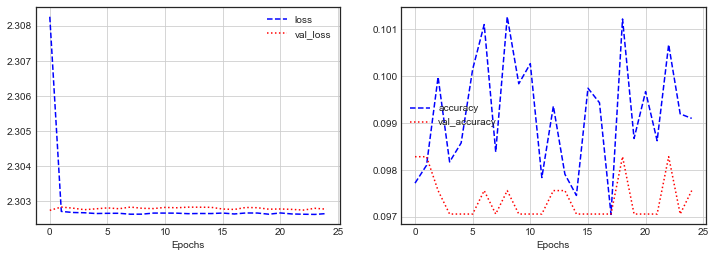

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

<H2>image argumentation


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
image_genetator = ImageDataGenerator(
    rotation_range=10,# 지정된 각도 범위내에서 임의로 원본이미지를 회전
    zoom_range=0.2, # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소
		#밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냅니다.
    shear_range=0.6,
    width_shift_range=0.1,# 지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동
    height_shift_range=0.1, # 지정된 수직방향 이동 범위내에서 임의로 원본이미지를 이동
    horizontal_flip=True, # input을 무작위로 가로로 돌림
    vertical_flip=False # input을 무작위로 세로로 돌림
)

In [45]:
argument_size = 200

In [46]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [48]:
x_argument = image_genetator.flow(np.tile(x_train[0].reshape(28*28*1), argument_size).reshape(-1, 28, 28, 1),
                                          np.zeros(argument_size), batch_size=argument_size, shuffle=False).next()[0]

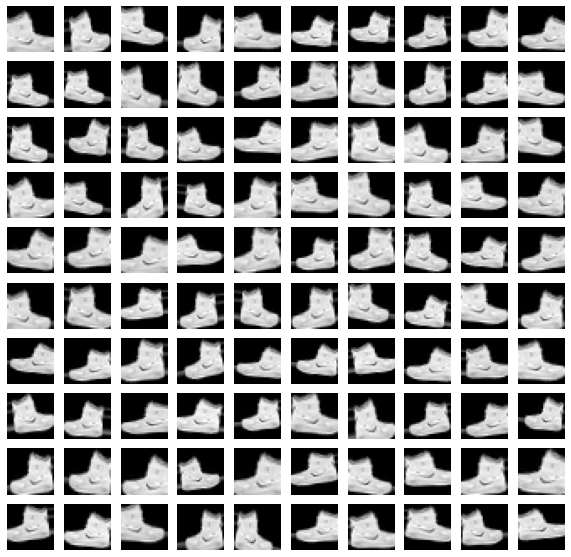

In [49]:
plt.figure(figsize=(10, 10))

for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_argument[i-1].reshape(28, 28), cmap='gray')

<H1>데이터 추가

In [50]:
image_genetator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [51]:
argument_size=30000

In [52]:
random_mask = np.random.randint(x_train.shape[0], size=argument_size)
x_argumented = x_train[random_mask].copy()
y_argumented = y_train[random_mask].copy()

In [53]:
x_argumented = image_genetator.flow(x_argumented, np.zeros(argument_size),
                                    batch_size=argument_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_argumented))
y_train = np.concatenate((y_train, y_argumented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


In [54]:
model_4 = build_model3()
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [55]:
hist_5 = model_4.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25


2022-08-16 02:01:20.565136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - ETA: 0s - loss: 0.7116 - acc: 0.7409

2022-08-16 02:01:57.814531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - 41s 83ms/step - loss: 0.7116 - acc: 0.7409 - val_loss: 0.9265 - val_acc: 0.6538
Epoch 2/25
493/493 [==============================] - 36s 74ms/step - loss: 0.4069 - acc: 0.8529 - val_loss: 0.7490 - val_acc: 0.7240
Epoch 3/25
493/493 [==============================] - 37s 74ms/step - loss: 0.3383 - acc: 0.8786 - val_loss: 0.6858 - val_acc: 0.7479
Epoch 4/25
493/493 [==============================] - 37s 74ms/step - loss: 0.3058 - acc: 0.8885 - val_loss: 0.6130 - val_acc: 0.7736
Epoch 5/25
493/493 [==============================] - 37s 75ms/step - loss: 0.2822 - acc: 0.8983 - val_loss: 0.5853 - val_acc: 0.7829
Epoch 6/25
493/493 [==============================] - 37s 74ms/step - loss: 0.2643 - acc: 0.9056 - val_loss: 0.5499 - val_acc: 0.8026
Epoch 7/25
493/493 [==============================] - 37s 75ms/step - loss: 0.2515 - acc: 0.9080 - val_loss: 0.5407 - val_acc: 0.7997
Epoch 8/25
493/493 [==============================] - 37s 75ms/step - los

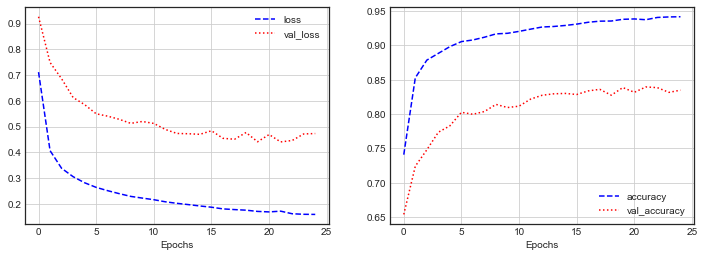

In [56]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_5.history['loss'], 'b--', label='loss')
plt.plot(hist_5.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_5.history['acc'], 'b--', label='accuracy')
plt.plot(hist_5.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [57]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.1918 - acc: 0.9328


[0.1918497383594513, 0.9328000545501709]

-주요 인자 참고: https://keras.io/ko/preprocessing/image/